In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<Axes: xlabel='count', ylabel='sentiment'>

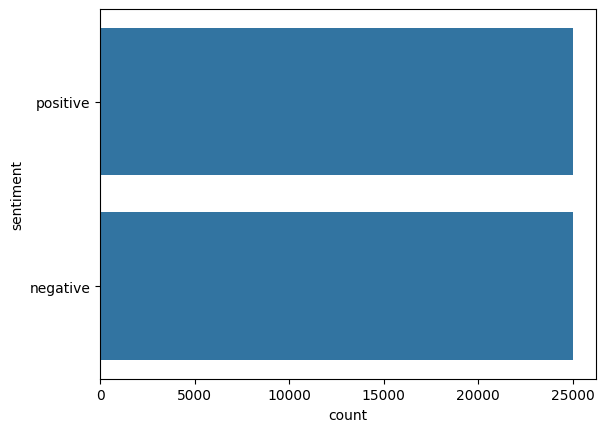

In [26]:
import seaborn as sns
sns.countplot (df['sentiment'])

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment'] = le.fit_transform (df['sentiment'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


lowercase

In [28]:
df['review'] = df['review'].str.lower ()

remove punctuations

In [29]:
import string 

list = string.punctuation
print (list)
def remove_punctuation (text):
    for i in list:
        text.replace (i,"")

    return text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [30]:
df['review'] = remove_punctuation (df['review'])

stop words

In [31]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Advait
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    words = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join (words)

In [33]:
df ['review'] = df['review'].apply (remove_stopwords)
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. <br /><br />the f...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


In [34]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size= 0.2, random_state=1)

In [35]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

Tokeniser 

In [36]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts (x_train)

In [37]:
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

In [38]:
# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=200, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=200, padding='post', truncating='post')


In [39]:
model = keras.Sequential ([

    keras.layers.Embedding (10000, 128),
    keras.layers.LSTM (64, return_sequences=True),
    # keras.layers.Dropout (0.5),
    keras.layers.LSTM(32),  
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile (optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit (X_train_pad, y_train, epochs= 10, batch_size = 32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 75ms/step - accuracy: 0.6170 - loss: 0.6267
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 241s 193ms/step - accuracy: 0.7769 - loss: 0.4857
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 212ms/step - accuracy: 0.7845 - loss: 0.4715
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 302s 195ms/step - accuracy: 0.8037 - loss: 0.4393
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 174ms/step - accuracy: 0.8182 - loss: 0.4099
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 83ms/step - accuracy: 0.8274 - loss: 0.3899
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 97ms/step - accuracy: 0.8440 - loss: 0.3691
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 90ms/step - accuracy: 0.8528 - loss: 0.3435
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.8638 - loss: 0.3260
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1672s 1s/step - accuracy: 0.8652 - loss: 0.3225


In [69]:
y_pred = model.predict (y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [70]:
y_pred[0]

array([0.5932878], dtype=float32)

In [71]:
y_pred = (y_pred > 0.5 ).astype(int)

In [72]:
from sklearn.metrics import classification_report 


In [73]:
print (
classification_report (y_true= y_test, y_pred= y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5044
           1       0.50      1.00      0.66      4956

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



c:\Users\Advait Shinde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Advait Shinde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Advait Shinde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [79]:
# #extra

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend(loc=0)

# plt.show()


# model alt
# import tensorflow as tf
# import tensorflow as tf
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import seaborn as sns


# tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
# tokenizer.fit_on_texts(training_reviews)
# word_index = tokenizer.word_index
# training_sequence = tokenizer.texts_to_sequences(training_reviews)
# testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
# train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
# test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
# print('Total Unique Words : {}'.format(len(word_index)))


# model = tf.keras.Sequential([tf.keras.layers.Embedding(10000, 512 ,trainable=False),
#                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#                              tf.keras.layers.Dropout(0.5),
#                              tf.keras.layers.Dense(256,activation = 'relu',),
#                              tf.keras.layers.Dense(128,activation = 'relu'),
#                              tf.keras.layers.Dropout(0.5),
#                              tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])


# model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
# history = model.fit(train_pad_sequence,training_labels,epochs = 30 ,validation_data=(test_pad_sequence,testing_labels))


#custom 

sample_review = "This movie was mind blowing"

# Step 1: Preprocess
sample_seq = tokenizer.texts_to_sequences([sample_review])
sample_pad = pad_sequences(sample_seq, maxlen=200, padding='post', truncating='post')

# Step 2: Predict
prediction = model.predict(sample_pad)

# Step 3: Interpret
print(f"Confidence Score: {prediction[0][0]}")
if prediction[0][0] > 0.5:
    print("Predicted Sentiment: Positive 😊")
else:
    print("Predicted Sentiment: Negative 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Confidence Score: 0.847841739654541
Predicted Sentiment: Positive 😊
